# glue

```{admonition} definition
add a key to variables in a notebook, 
then **display those variables in your book by referencing the key.**
```

## glue function
* name: book(page) 상세서 사용되는 유니크 명칭(key)
* variable: jupyter notebook으로 생성된 객체(str, graph etc)
* display: true/false

In [22]:
from myst_nb import glue

In [25]:
help(glue)

Help on function glue in module myst_nb:

glue(name: str, variable, display: bool = True) -> None
    Glue a variable into the notebook's cell metadata.
    
    Parameters
    ----------
    name: string
        A unique name for the variable. You can use this name to refer to the variable
        later on.
    variable: Python object
        A variable in Python for which you'd like to store its display value. This is
        not quite the same as storing the object itself - the stored information is
        what is *displayed* when you print or show the object in a Jupyter Notebook.
    display: bool
        Display the object you are gluing. This is helpful in sanity-checking the
        state of the object at glue-time.



## usecase

### graph

#### 1) drawing scatter graph

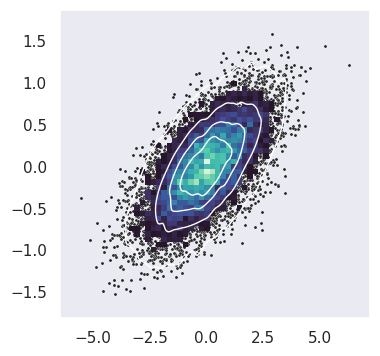

In [28]:
# Visualize seaborn scatter chart
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

glue("scatter_graph", f, display=False)

#### 2) display the graph
* binding the graph(f) in in-line text(markdown)

::::{tab-set}
:::{tab-item} example
```
In-line text; a figure: {glue:}`scatter_graph`.
```
:::
::::

::::{tab-set}
:::{tab-item} result
In-line text; a figure: {glue:}`scatter_graph`
:::
::::

### table

#### 1) dataframe

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")

df.style.set_table_attributes('style="font-size: 10px"')

glue('df_tbl', df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 2) display(binding) in the book

::::{tab-set}
:::{tab-item} example
```
```{glue:figure} df_tbl
:figwidth: 100px
:name: 'tbl:df'

titanic dataset
```
:::
::::

::::{tab-set}
:::{tab-item} result
```{glue:figure} df_tbl
:figwidth: 80%
:name: 'tbl:df'

titanic dataset
```
:::
::::